# NBaIoT SOM HYPEROPT CLASSIFY

## Device 3

- Training on device 3 (using Gafgyt).
- Testing on device 3 (Gafgyt)

# Imports

In [1]:
# import sys
import sys
import os
import random
import numpy as np
import pandas as pd

# from hyperopt import fmin, tpe, hp, STATUS_OK, rand, atpe, mix, anneal

from sklearn.model_selection import train_test_split

In [2]:
print(os.path.dirname(os.path.dirname(os.getcwd())))
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))

/home/ladin/projects/research/iot-anomaly-detection


In [3]:
from utils.config import data_path, nbaiot_1K_data_path, nbaiot_10K_data_path, nbaiot_5K_data_path, \
    nbaiot_20K_data_path, nbaiot_data_path, dn_nbaiot
from utils.datasets import get_data, get_data_d3

In [4]:
# from pyscripts.main_som import main, process_train_test_partial, som_test, load_common_data, load_data_test
from pyscripts.main_som import process_train_test_partial, process_train_partial, som_test, load_data_test, process_train_som_hyperopt

## Set folder and gafgyt params

In [5]:
choose_folder = nbaiot_data_path

In [6]:
print(choose_folder)

/home/ladin/projects/research/iot-anomaly-detection/data/nbaiot


## Set training and testing devices

In [7]:
train_index = 3

In [8]:
train_index

3

## Set params (percentage, num_features)

In [9]:
# train_size = 0.5
# test_size = 0.5
# num_features = 29

# 1. Load data and preprocess data

In [10]:
# Load data on device 1
data_benign, target_benign, data_gafgyt, target_gafgyt = get_data_d3(choose_folder=choose_folder, choose_index=train_index)

In [11]:
(data_benign.shape, target_benign.shape), (data_gafgyt.shape, target_gafgyt.shape)

(((39100, 115), (39100,)), ((316400, 115), (316400,)))

## Split data

In [12]:
data_benign_train, data_benign_test, target_benign_train, target_benign_test = train_test_split(data_benign, target_benign, test_size=0.3, shuffle=True, random_state=1)

data_gafgyt_train, data_gafgyt_test, target_gafgyt_train, target_gafgyt_test = train_test_split(data_gafgyt, target_gafgyt, test_size=0.3, shuffle=True, random_state=1)

In [13]:
data_benign_train.shape, data_benign_test.shape, target_benign_train.shape, target_benign_test.shape

((27370, 115), (11730, 115), (27370,), (11730,))

In [14]:
data_gafgyt_train.shape, data_gafgyt_test.shape, target_gafgyt_train.shape, target_gafgyt_test.shape

((221480, 115), (94920, 115), (221480,), (94920,))

## Set ratio

In [15]:
benign_size = 10000 # data_benign_train.shape[0], build va train voi 10K
print(benign_size)

10000


In [16]:
ratio_1 = int(1.0*benign_size)

In [17]:
# get train data
data_benign_train, _, target_benign_train, _ = train_test_split(data_benign_train, target_benign_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [18]:
data_benign_train.shape, target_benign_train.shape

((10000, 115), (10000,))

## Get train data of benign and gafgyt by ratio

In [19]:
# train 1.0
data_gafgyt_1, _, target_gafgyt_1, _ = train_test_split(data_gafgyt_train, target_gafgyt_train, train_size=ratio_1, shuffle=True, random_state = 1)

In [20]:
print(data_gafgyt_1.shape, target_gafgyt_1.shape)

(10000, 115) (10000,)


In [21]:
# 1.0
X_train_gafgyt_1 = np.vstack([data_benign_train, data_gafgyt_1])
y_train_gafgyt_1 = np.hstack([target_benign_train, target_gafgyt_1])

In [22]:
print(X_train_gafgyt_1.shape, y_train_gafgyt_1.shape)

(20000, 115) (20000,)


## Get test data

Lay ra kich thuoc cua benign test.

Lay Mirai & Gafgyt cung bang kich thuoc cua benign test

In [23]:
benign_test_size = data_benign_test.shape[0]

In [24]:
benign_test_size

11730

### Gafgyt

In [25]:
data_gafgyt_test.shape

(94920, 115)

In [26]:
# split first
data_gafgyt_test, _, target_gafgyt_test, _ = train_test_split(data_gafgyt_test, target_gafgyt_test, train_size=benign_test_size, shuffle=True, random_state = 1)

In [27]:
X_test_gafgyt = np.vstack([data_benign_test, data_gafgyt_test])
y_test_gafgyt = np.hstack([target_benign_test, target_gafgyt_test])
print(X_test_gafgyt.shape, y_test_gafgyt.shape)

(23460, 115) (23460,)


In [28]:
data_benign_test.shape, data_gafgyt_test.shape, target_benign_test.shape, target_gafgyt_test.shape

((11730, 115), (11730, 115), (11730,), (11730,))


# 4. Normal SOM train and test


## 4.1.4. Ratio 1.0

### 1) Set 15

### Train

In [29]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=15, som_y=15, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 3.5058774948120117


### Test on the same device

#### Test on gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.8334033  0.12663195 0.01885915 ... 0.91973841 1.16161131 1.15447587]
Visualize quantization error


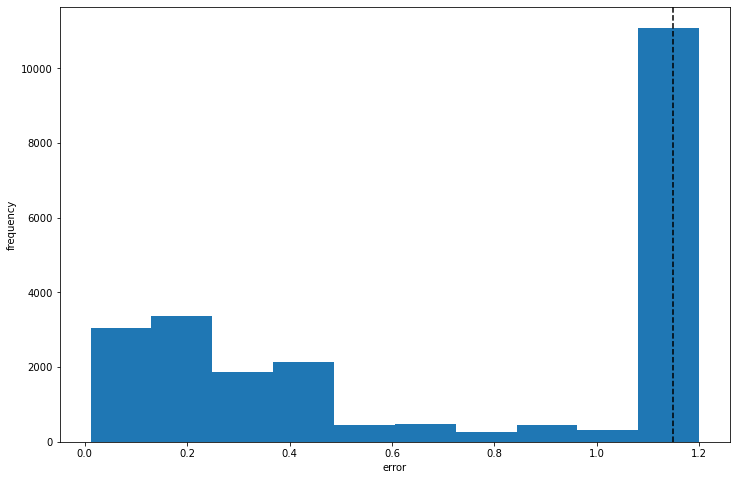

Outliers visualization


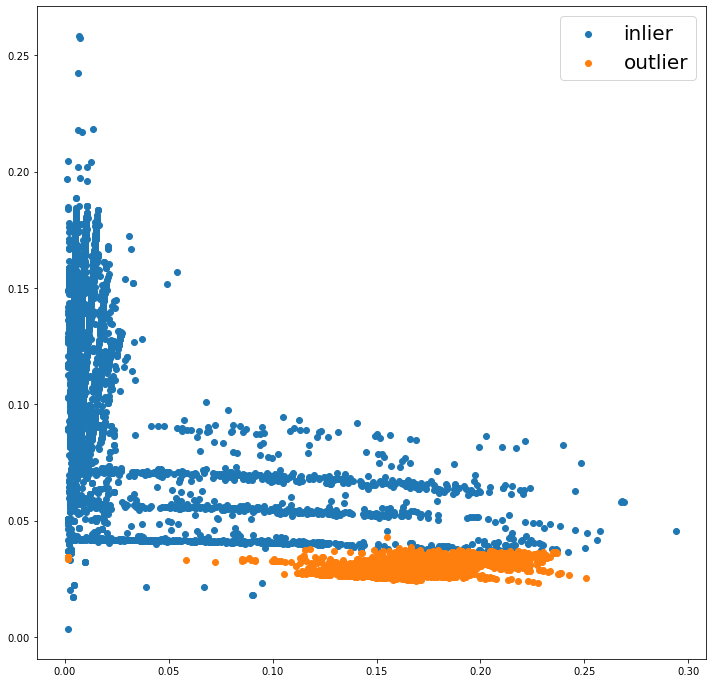

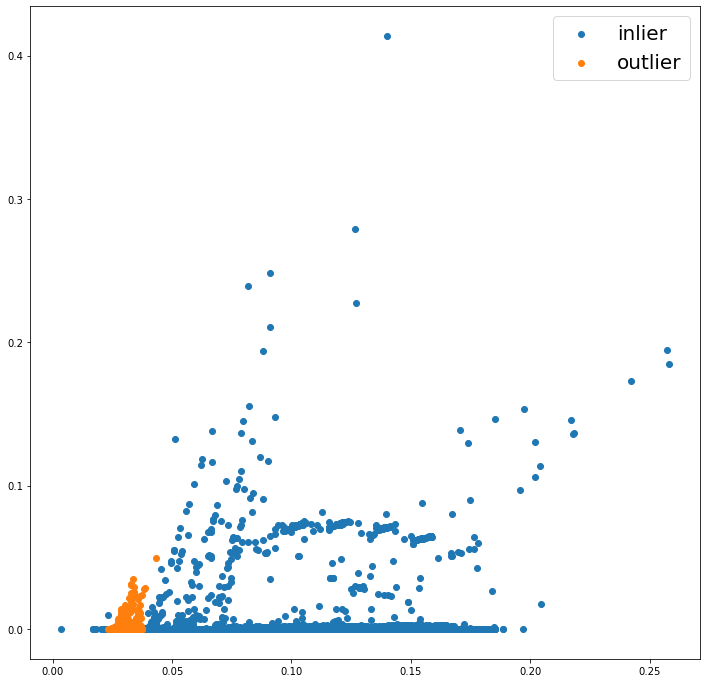

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.986     0.992     11730
           2      0.986     0.998     0.992     11730

    accuracy                          0.992     23460
   macro avg      0.992     0.992     0.992     23460
weighted avg      0.992     0.992     0.992     23460



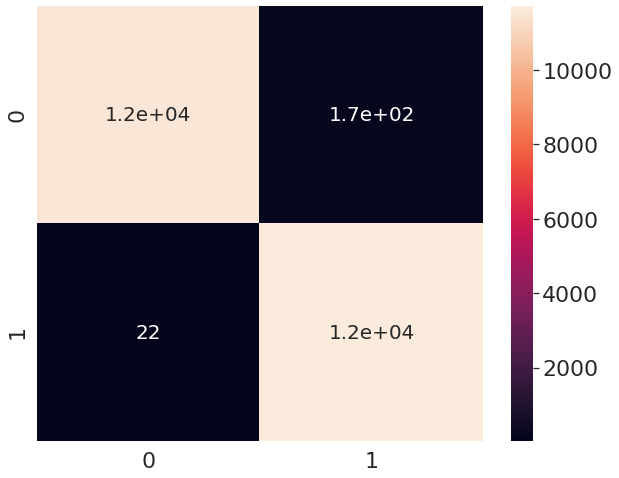

AUC score:  0.9919863597612958


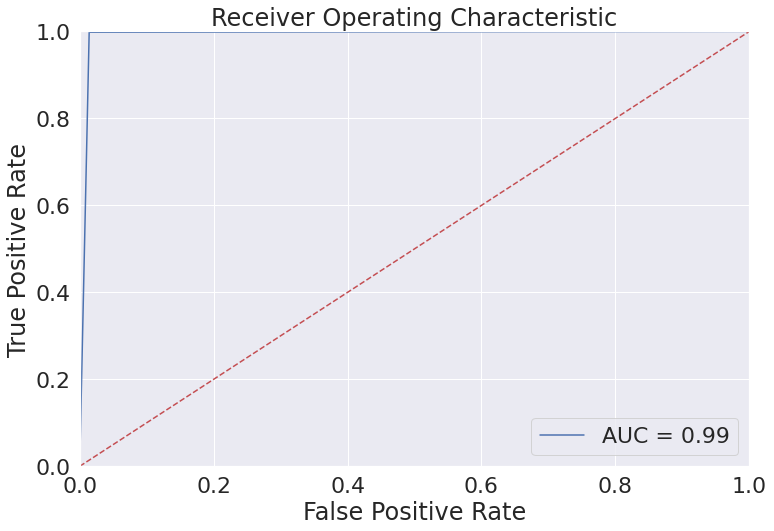

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [30]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 2) Set 22 (recommend size)

### Train

In [31]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=22, som_y=22, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 5.925377607345581


### Test on the same device

#### Test on gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.32929088 0.12088581 0.00687593 ... 0.97922233 1.14486549 1.15080294]
Visualize quantization error


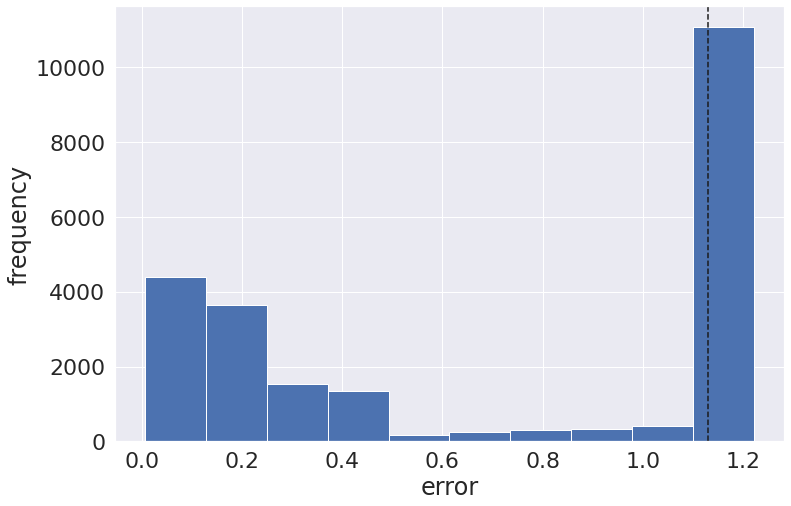

Outliers visualization


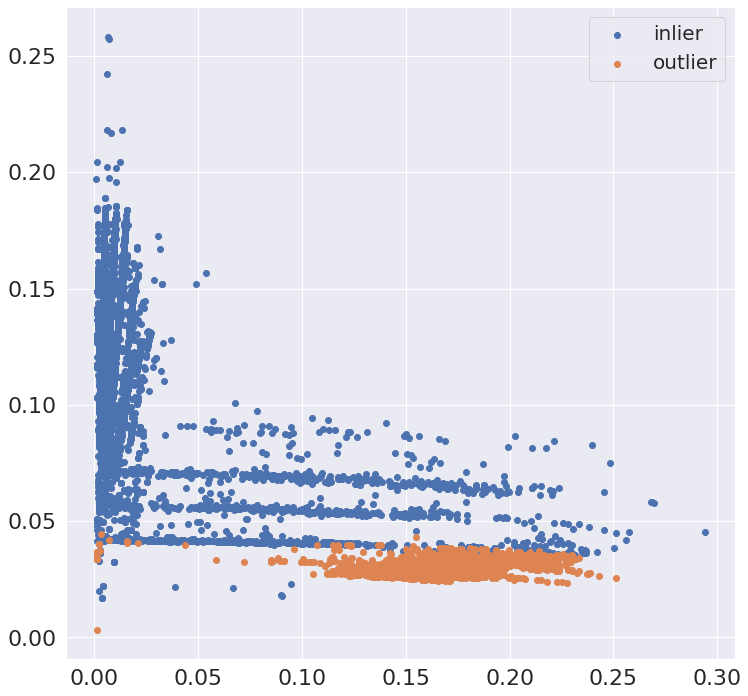

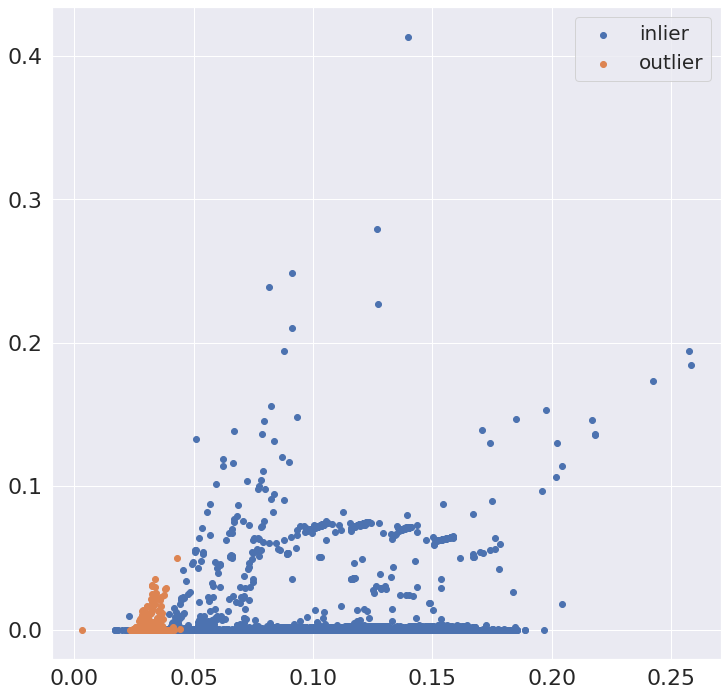

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.992     0.997     0.995     11730
           2      0.997     0.992     0.994     11730

    accuracy                          0.995     23460
   macro avg      0.995     0.995     0.995     23460
weighted avg      0.995     0.995     0.995     23460



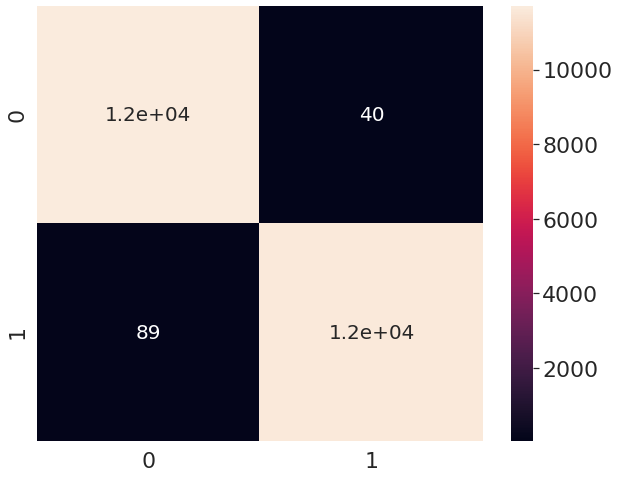

AUC score:  0.9945012787723785


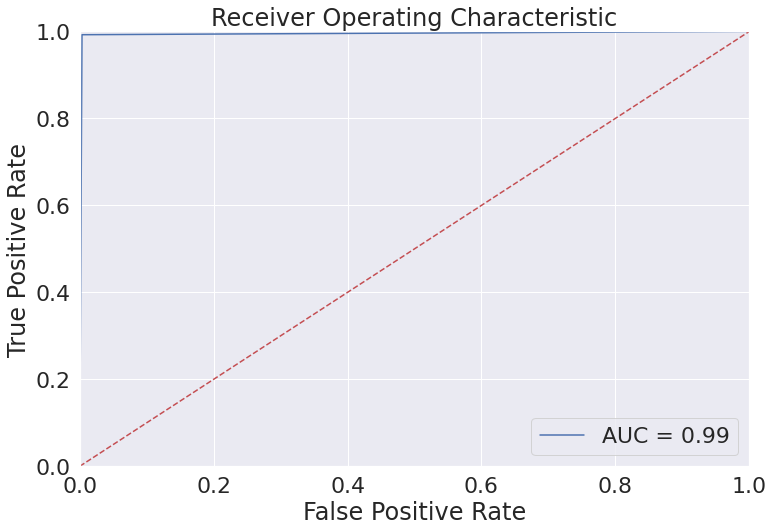

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [32]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 3) Set 30

### Train

In [33]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=30, som_y=30, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 10.358427286148071


### Test on the same device

#### Test on gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.44662321 0.01967868 0.01700237 ... 0.8562853  1.17223582 1.17750857]
Visualize quantization error


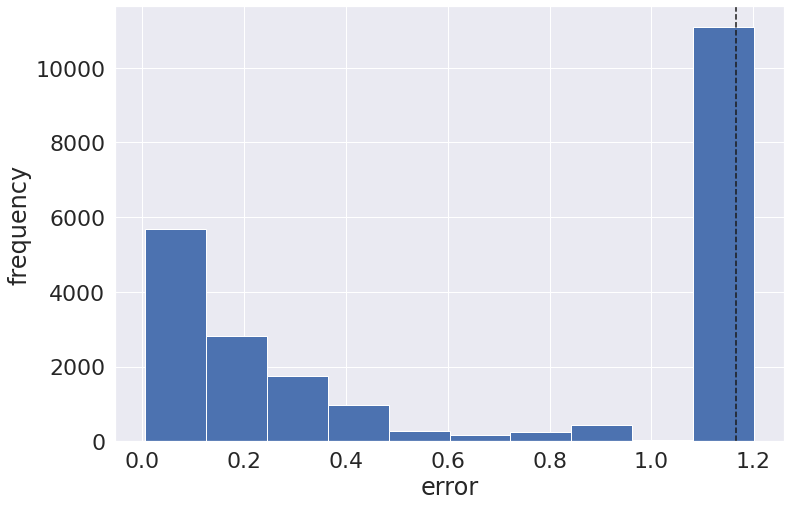

Outliers visualization


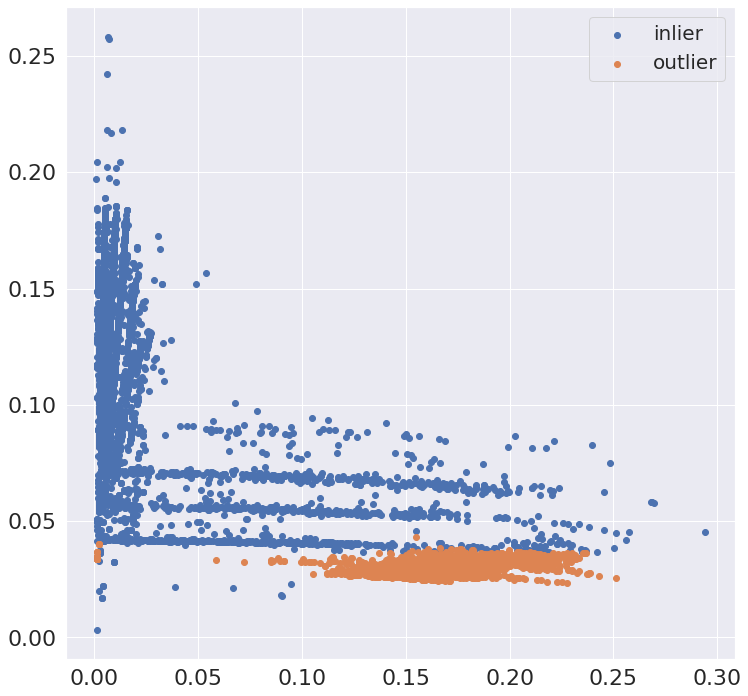

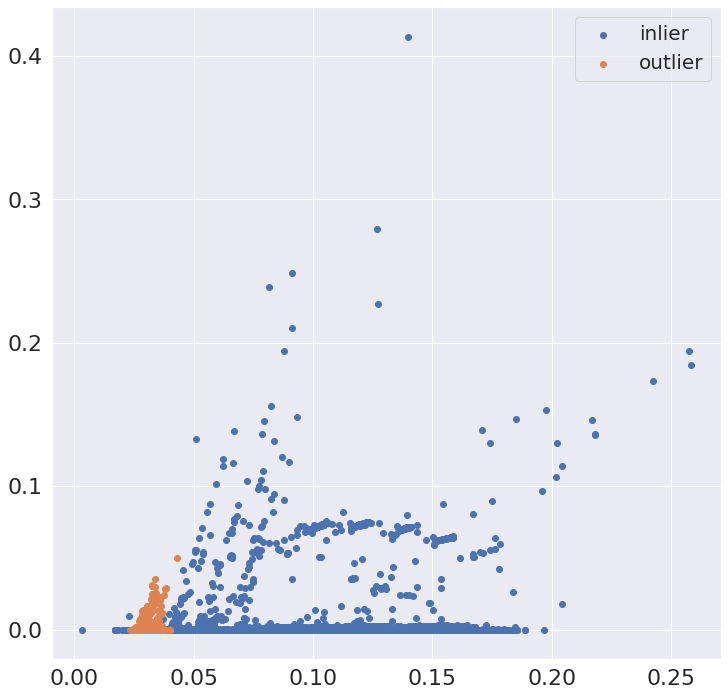

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.987     0.992     11730
           2      0.987     0.998     0.993     11730

    accuracy                          0.993     23460
   macro avg      0.993     0.993     0.993     23460
weighted avg      0.993     0.993     0.993     23460



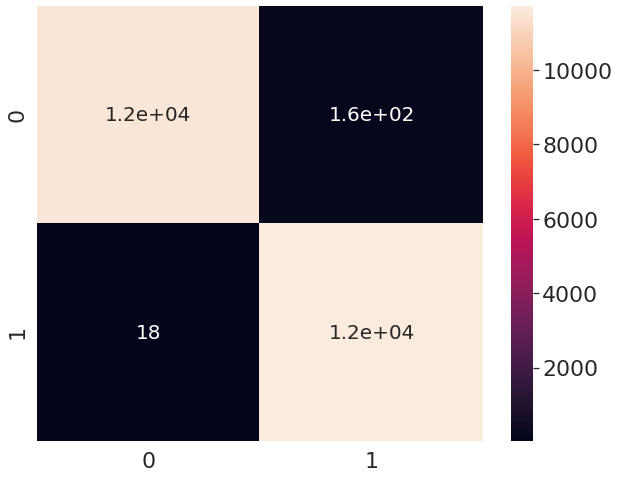

AUC score:  0.9925404944586529


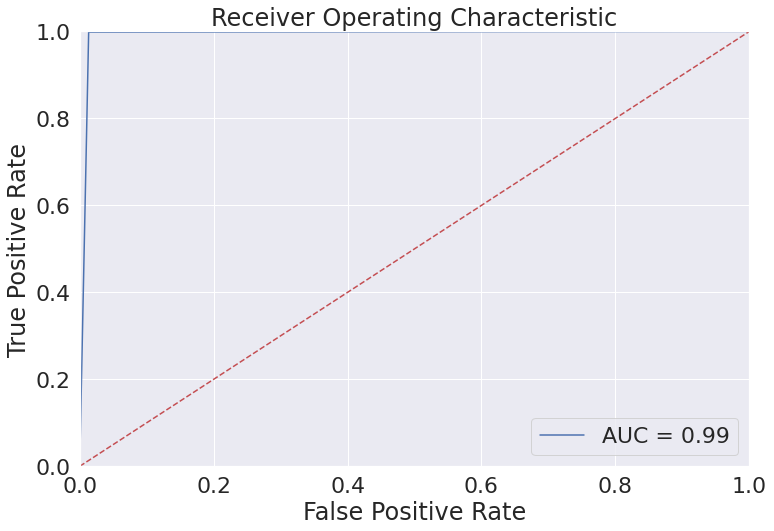

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [34]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 4) Set 45

### Train

In [35]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo=None, som_x=45, som_y=45, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 32.108558654785156


### Test on the same device

#### Test on gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.22384213 0.03067293 0.00463261 ... 0.88774834 1.16322686 1.16970921]
Visualize quantization error


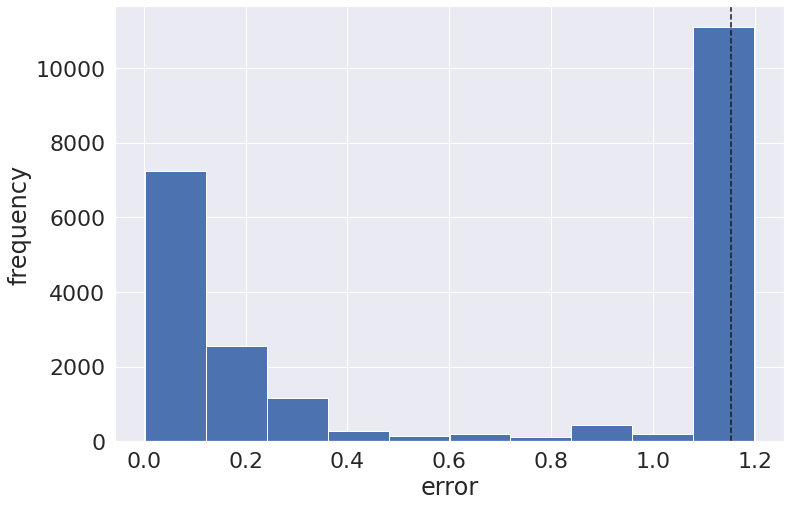

Outliers visualization


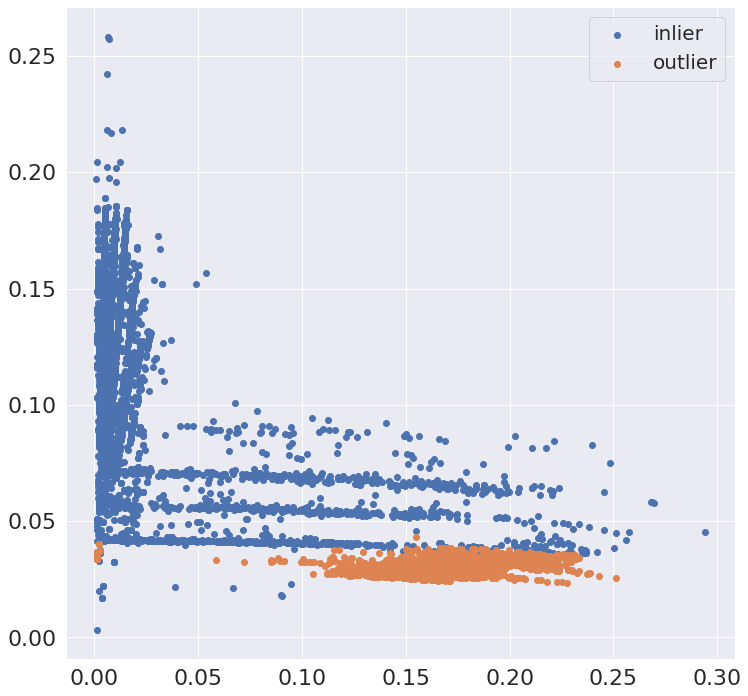

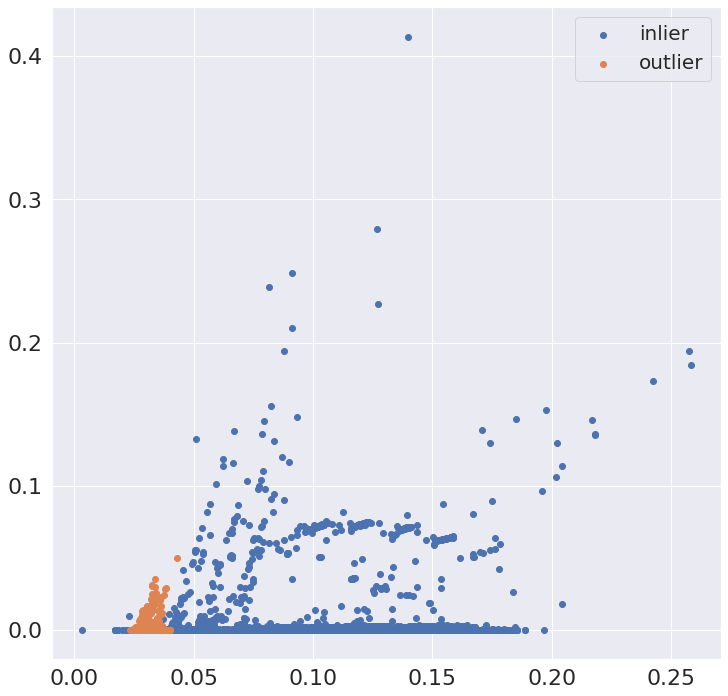

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.986     0.992     11730
           2      0.986     0.999     0.992     11730

    accuracy                          0.992     23460
   macro avg      0.992     0.992     0.992     23460
weighted avg      0.992     0.992     0.992     23460



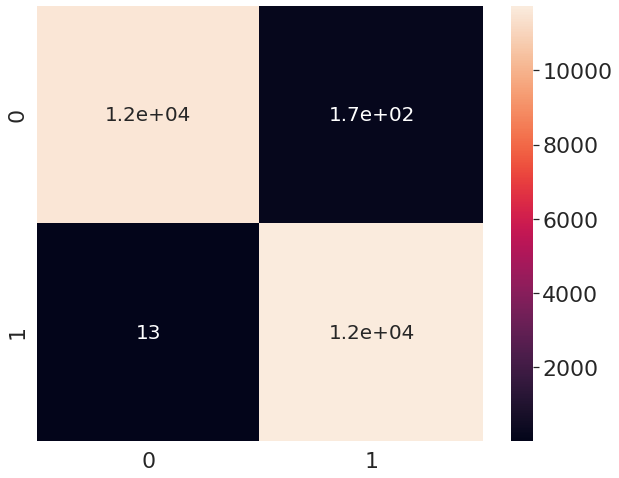

AUC score:  0.9923699914748507


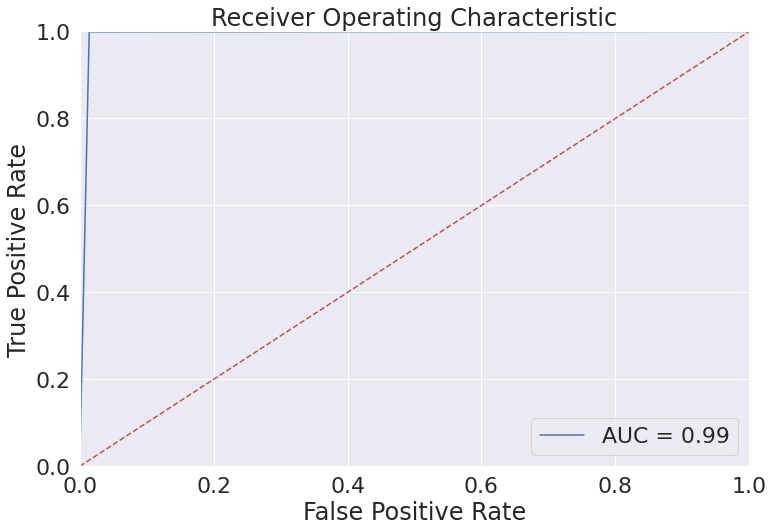

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [36]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 1) Algo tpe

### Train

In [37]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='tpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 82.39366579055786


### Test on the same device

#### Test on gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.56265389 0.01759555 0.01867053 ... 0.95352983 1.15939647 1.16157633]
Visualize quantization error


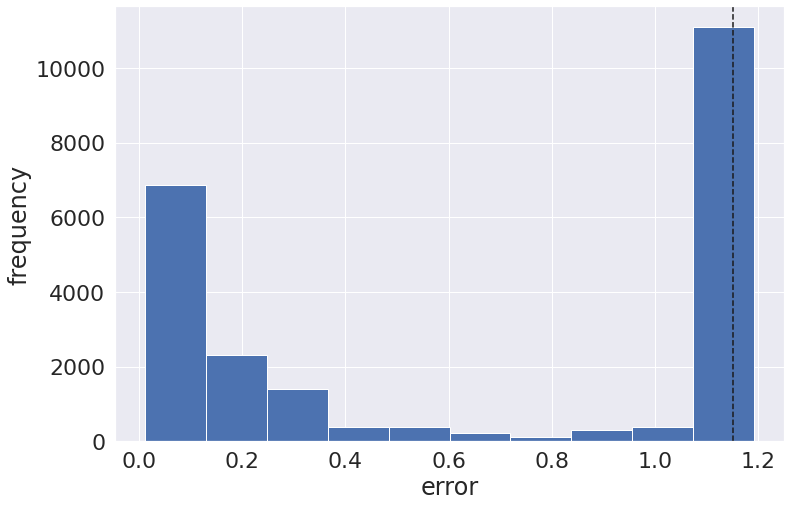

Outliers visualization


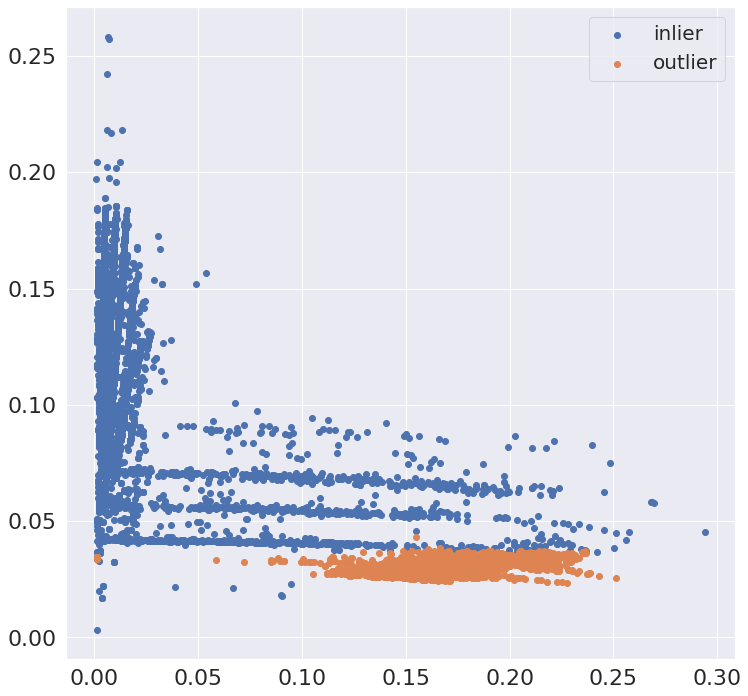

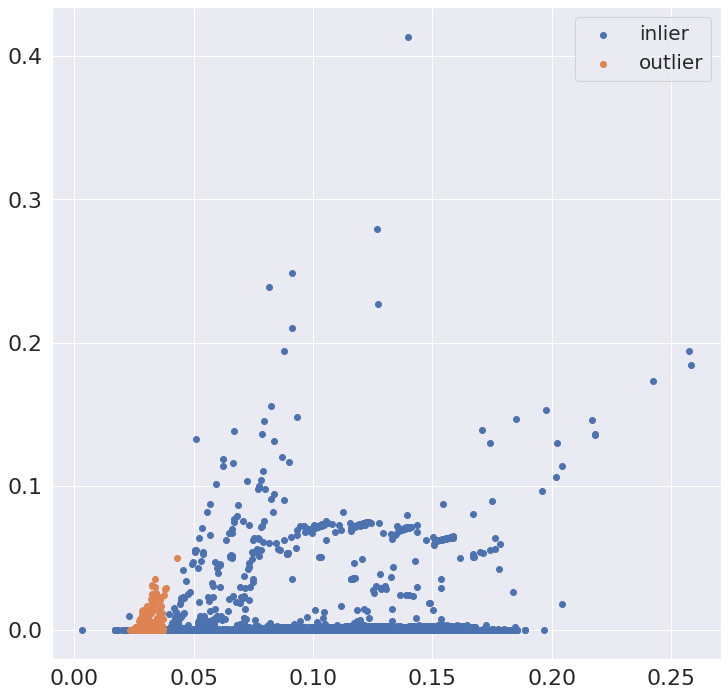

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.998     0.991     0.995     11730
           2      0.991     0.998     0.995     11730

    accuracy                          0.995     23460
   macro avg      0.995     0.995     0.995     23460
weighted avg      0.995     0.995     0.995     23460



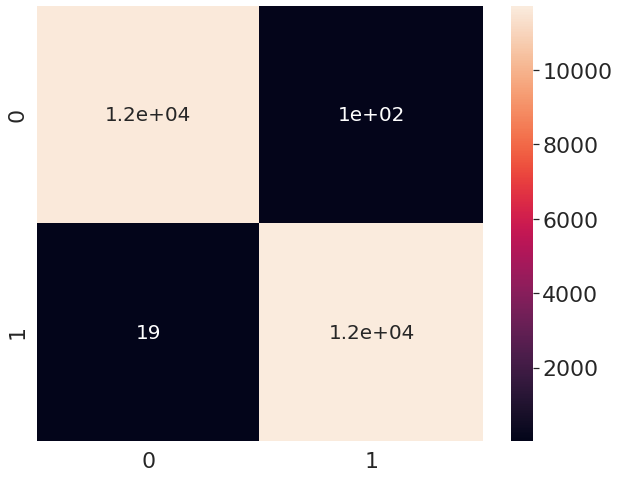

AUC score:  0.9948849104859335


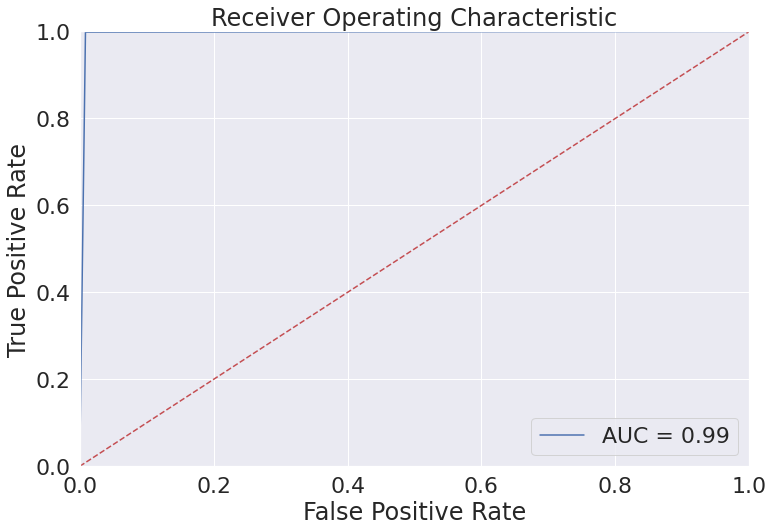

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [38]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 2) Algo rand

### Train

In [39]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='rand', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

/home/ladin/projects/research/iot-anomaly-detection/utils/minisom.py:370: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + c2*pc[pc_order[1]]


0.5
Total train time: 80.71818256378174


### Test Gafgyt

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.64134364 0.05143333 0.01426583 ... 1.05526413 1.16929416 1.17620661]
Visualize quantization error


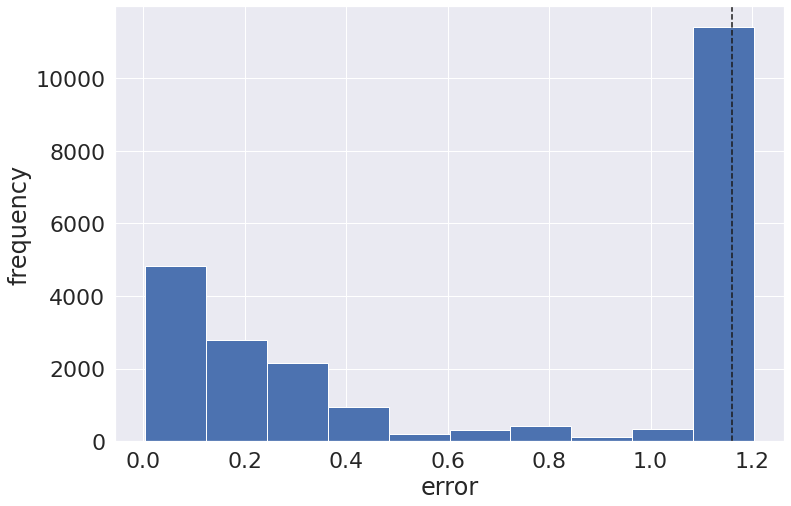

Outliers visualization


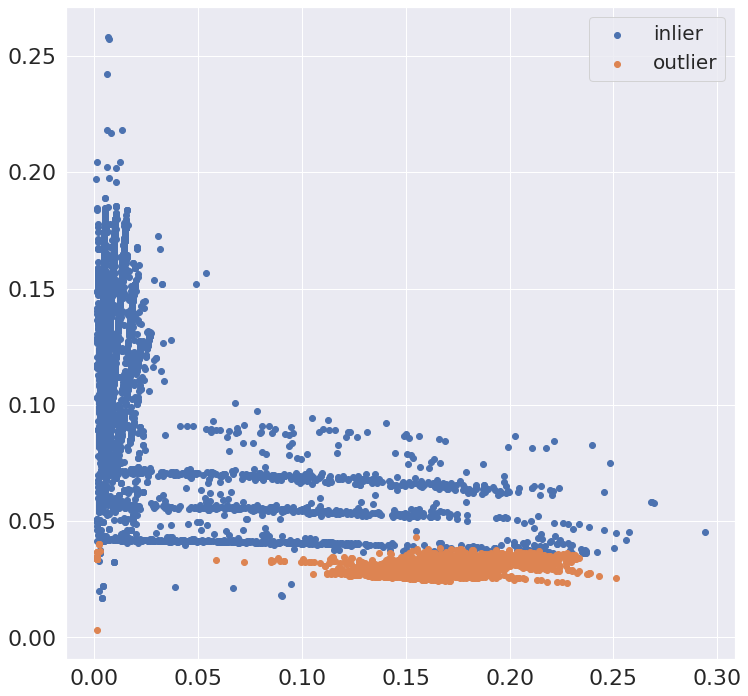

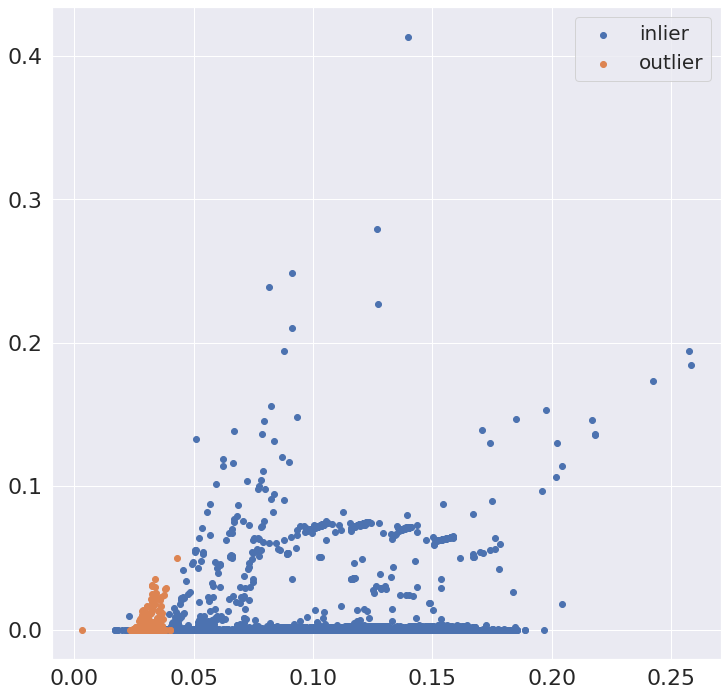

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.991     0.995     11730
           2      0.991     0.999     0.995     11730

    accuracy                          0.995     23460
   macro avg      0.995     0.995     0.995     23460
weighted avg      0.995     0.995     0.995     23460



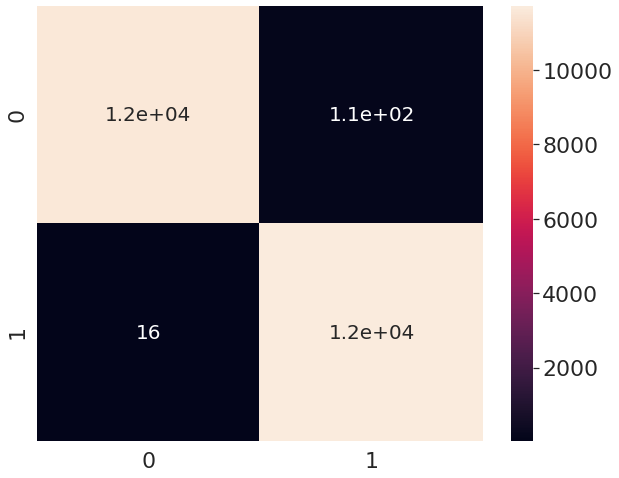

AUC score:  0.9946717817561808


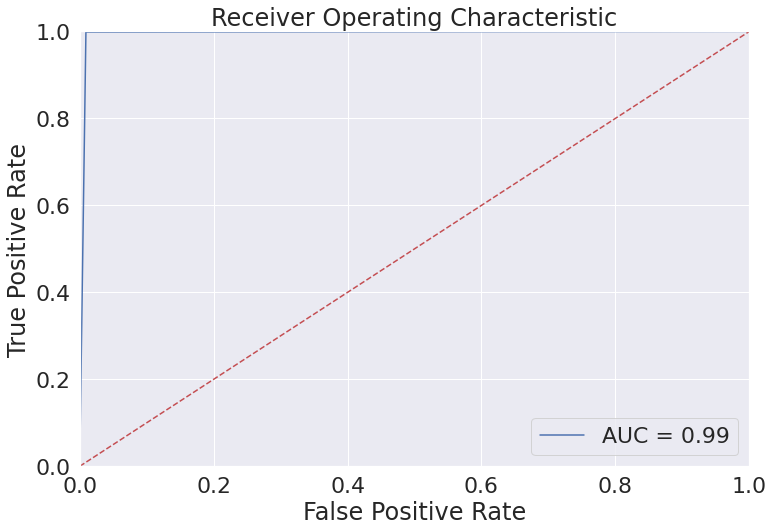

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [40]:
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 3) Algo atpe

In [41]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='atpe', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.74509442 0.02847518 0.05383335 ... 0.88184241 1.17302953 1.17324056]
Visualize quantization error


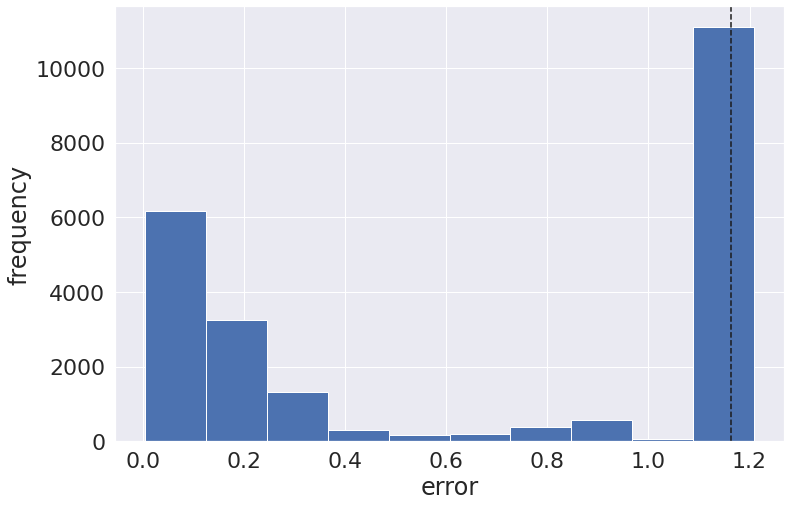

Outliers visualization


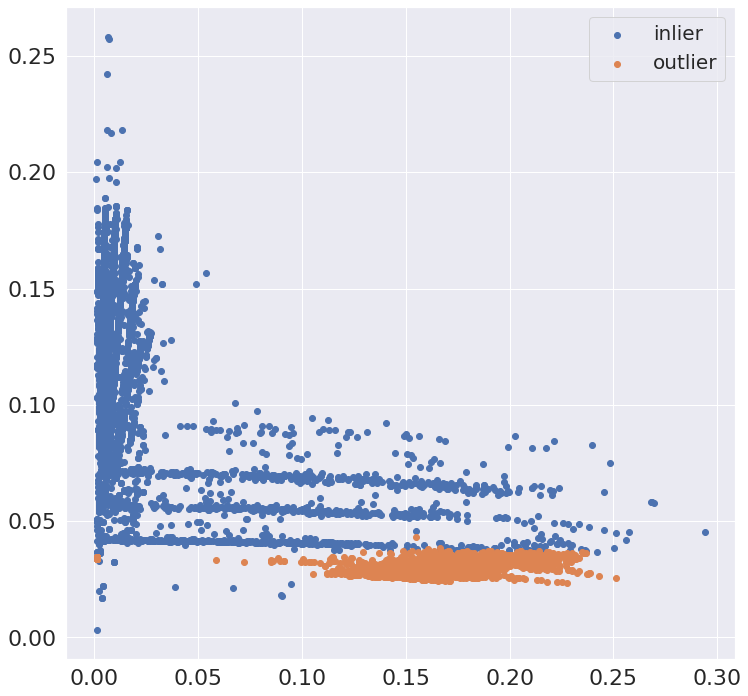

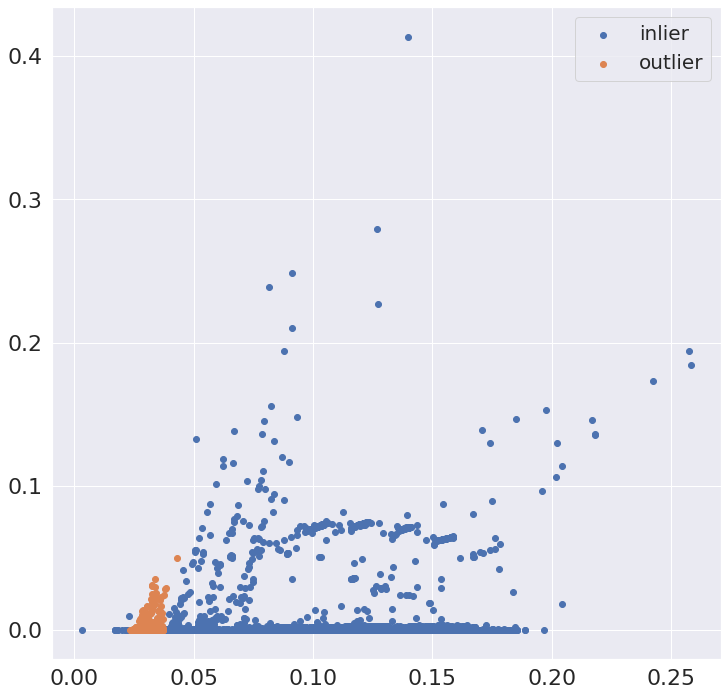

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.997     0.991     0.994     11730
           2      0.992     0.997     0.994     11730

    accuracy                          0.994     23460
   macro avg      0.994     0.994     0.994     23460
weighted avg      0.994     0.994     0.994     23460



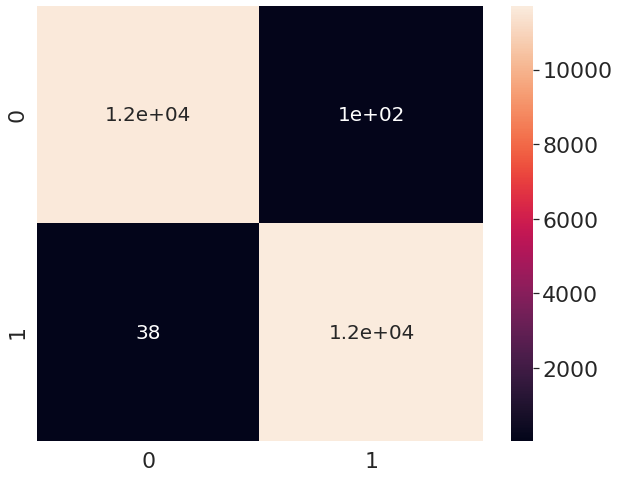

AUC score:  0.9941176470588236


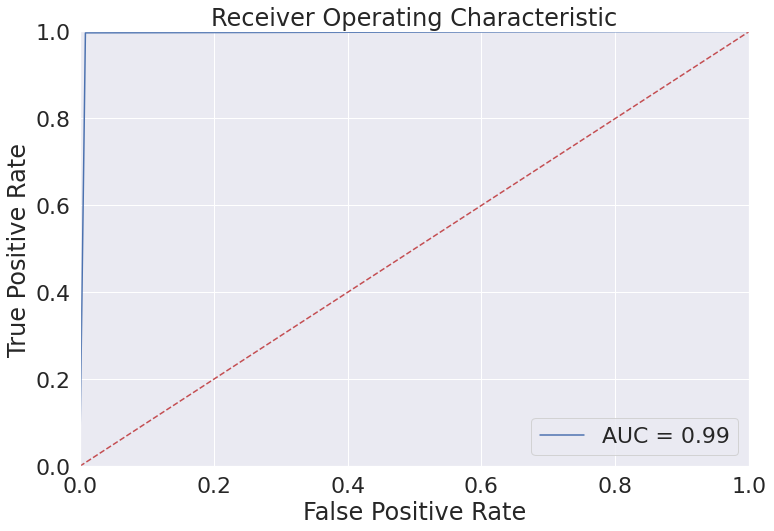

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [42]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)

### 4) Algo anneal

In [43]:
som, winmap, outliers_percentage, scaler = process_train_som_hyperopt(X_train_gafgyt_1, y_train_gafgyt_1, algo='anneal', som_x=None, som_y=None, sigma=6, learning_rate=2.0, verbose=False, show_progressbar = False)

--------------Training and testing SOM in the same device----------------
(20000, 115) (20000,)
------------Scale data-----------------
(20000, 115) (20000,)
X_train_scaled
[[ 1.31395172e-02  1.06082082e-01  1.37480434e-03 ...  4.19582226e-04
  -1.55261870e-06 -1.34832759e-02]
 [ 3.30693486e-03  7.70102789e-02  6.64805362e-10 ...  4.38530953e-18
  -5.05299169e-34 -4.51120146e-17]
 [ 5.01739837e-03  3.32487028e-01  1.69236814e-01 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 6.61376529e-03  1.15515413e-01  7.50693259e-18 ...  4.84109696e-04
  -4.19921338e-05 -3.11583602e-01]
 [ 1.31607077e-02  8.66855888e-02  1.39833367e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]
 [ 1.97457169e-02  9.63091730e-02  1.85814087e-03 ...  7.64879569e-04
   0.00000000e+00  0.00000000e+00]]
(20000, 115) (20000,)
---------Normalize data--------------
(20000, 115) (20000,)
--------------------Train SOM on normalized data--------------
---------------------------------Train SOM----

Shape:  (23460, 115) (23460,)
----------------------Test is starting----------------------
Scale data
Shape:  (23460, 115) (23460,)
Shape:  (23460, 115) (23460,)
Normalize data
Shape:  (23460, 115) (23460,)
Testing
----------------------------------------------------------------------
Compute quantization errors and error threshold
[0.21739591 0.02559381 0.00542691 ... 1.03320767 1.15675295 1.16298695]
Visualize quantization error


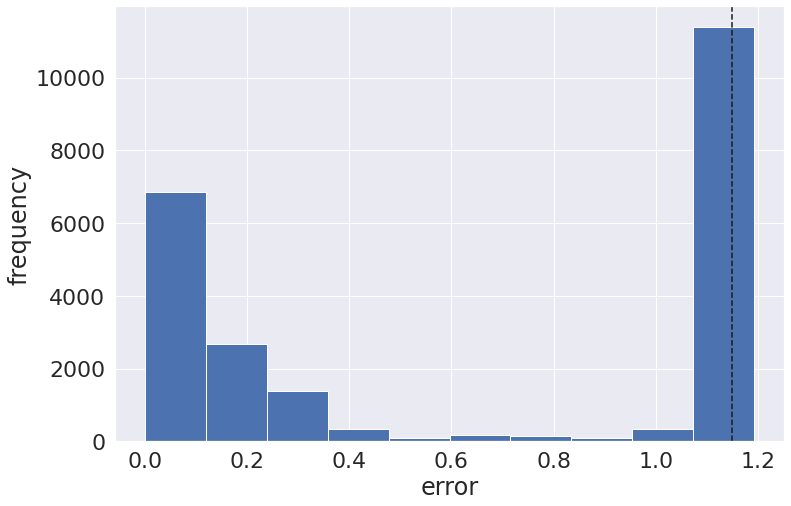

Outliers visualization


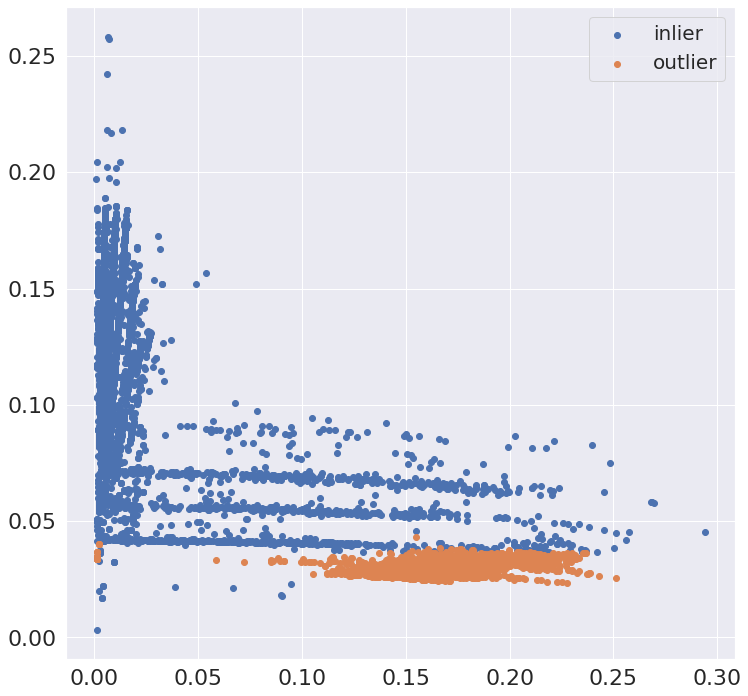

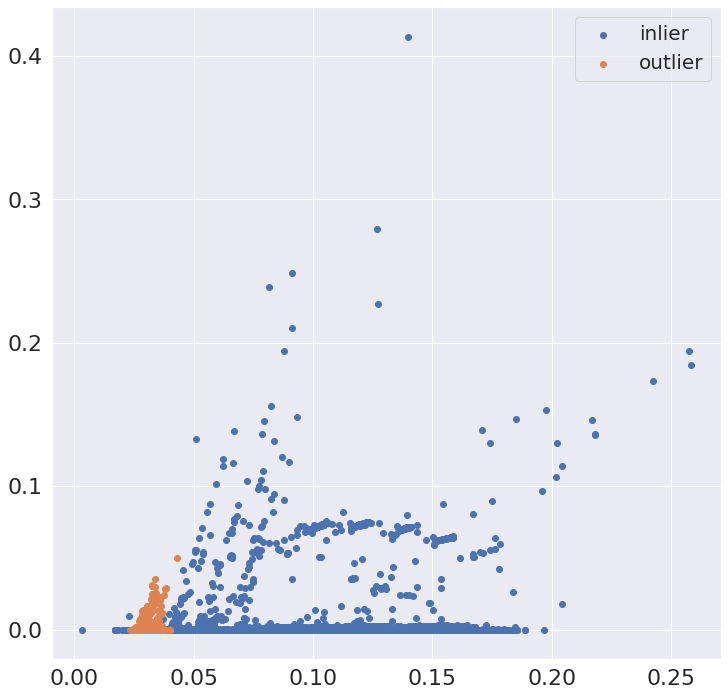

----------------------------------------------------------------------
SOM classification
              precision    recall  f1-score   support

           1      0.999     0.989     0.994     11730
           2      0.989     0.999     0.994     11730

    accuracy                          0.994     23460
   macro avg      0.994     0.994     0.994     23460
weighted avg      0.994     0.994     0.994     23460



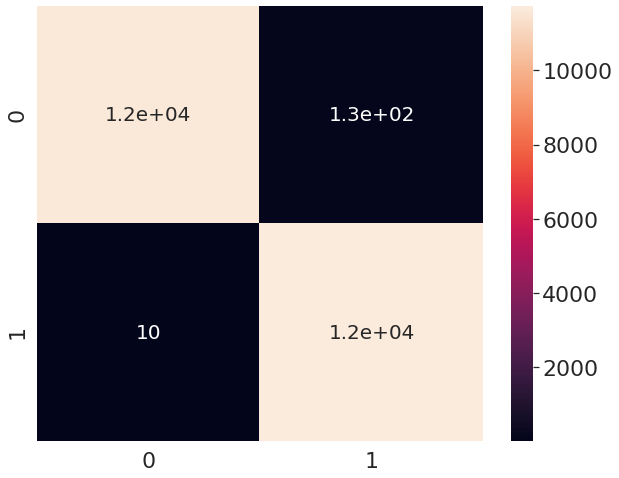

AUC score:  0.994160272804774


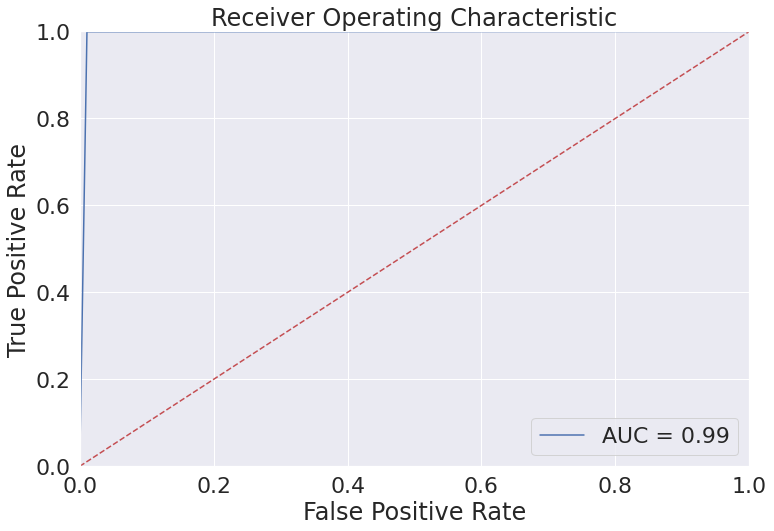

-----------Testing SOM done!-------------
----------------------Test Done----------------------


In [44]:
# test on gafgyt
som_test(som=som, winmap=winmap, outliers_percentage=outliers_percentage, scaler=scaler, X_test=X_test_gafgyt, y_test=y_test_gafgyt, encoder=None, pca=None)